# WAV file quality

In this notebook we create an arpeggio and use it to demonstrate the effect of sample rates on the file quality. For this purpose we:

- look up frequencies of notes in a table
- generate short pieces of sine wave corresponding to that frequency
- concatenate them into a melody
- and then repeat this excercise with `wavestacker.MonoAudioBuffer` objects with decreasing sample rate

The resulting audio looses detail due to [aliasing](https://en.wikipedia.org/wiki/Aliasing). The default sample rate of 44100Hz is a typical value for audio applications. According to the Nyquist-Shannon sampling theorem, to accurately reproduce a signal, it must be sampled at least twice the frequency of its highest frequency component. Human hearing typically ranges up to 20 kHz ($<\frac{44100}{2}$Hz).

In [1]:
# the waveshape module is in the parent directory
import sys
sys.path.append(f'{sys.path[0]}/..')

In [3]:
# notes can be taken from a table like https://www.liutaiomottola.com/formulae/freqtab.htm
notes = {
    'C3':  65.406, 
    'D3':  73.416, 
    'E3':  82.407, 
    'F3':  87.307, 
    'G3':  97.999, 
    'A3': 110.000,
    'B3': 123.471, 
    'C3': 130.813,
    'C4': 130.813,
    'D4': 146.832,
    'E4': 164.814,
    'F4': 174.614,
    'G4': 195.998,
    'A4': 220.000,
    'B4': 246.942
}
# or calculated as described in
# https://stackoverflow.com/a/70963520

c3major = [notes[n] for n in ('C3', 'E3', 'G3', 'B3')]
c4major = [notes[n] for n in ('C4', 'E4', 'G4', 'B4')]


MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=44100Hz), contains 19.20s
16 44100


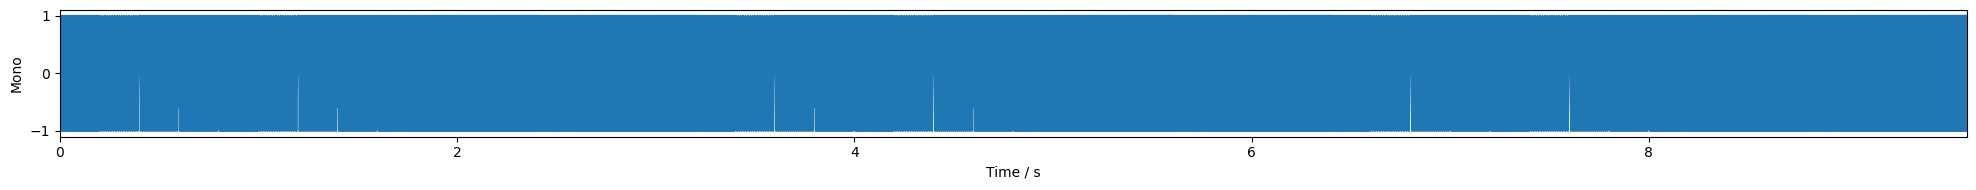

In [4]:
import wavestacker
import numpy as np

def generate_sine_wave(frequency, duration, sample_rate):
    time_array = np.linspace(0, duration, int(sample_rate * duration))
    sine_wave = np.sin(2 * np.pi * frequency * time_array)
    return sine_wave

sample_rate = 44100  # Sample rate in Hz
buffer = wavestacker.MonoAudioBuffer(sample_rate=sample_rate)

frequencies = c3major * 2 + c4major * 2
frequencies = frequencies * 3

tone_length = 0.2  # seconds
notes = [generate_sine_wave(freq, tone_length, sample_rate) for freq in frequencies] 
y = np.concatenate(notes)

buffer.add_audio_data(y)
print(buffer)
print(buffer.encoder.bits_per_sample, buffer.sample_rate)
fig, axs = buffer.plot()
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=44100Hz), contains 19.20s
16 44100


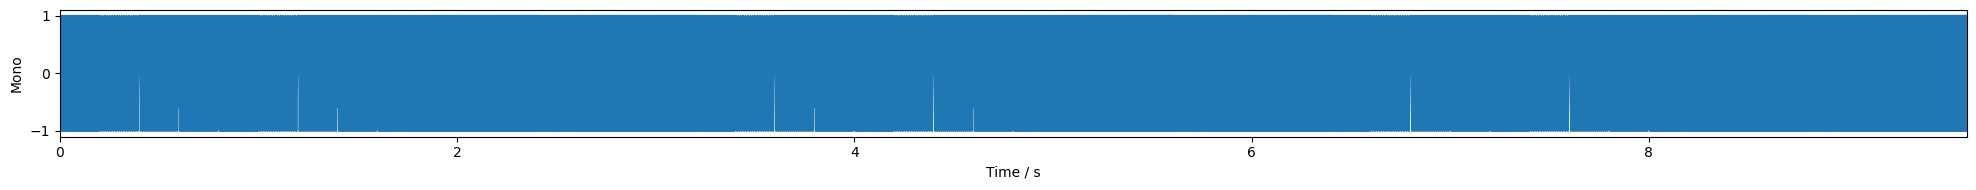

In [5]:
def make_sequence(frequencies, tone_length=0.2, sample_rate=44100):
    buffer = wavestacker.MonoAudioBuffer(sample_rate=sample_rate)
    notes = [generate_sine_wave(freq, tone_length, sample_rate) for freq in frequencies] 
    y = np.concatenate(notes)
    buffer.add_audio_data(y)
    print(buffer)
    print(buffer.encoder.bits_per_sample, buffer.sample_rate)
    fig, axs = buffer.plot()
    return buffer

buffer = make_sequence(frequencies, sample_rate=int(44100/2**0))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=22050Hz), contains 19.20s
16 22050


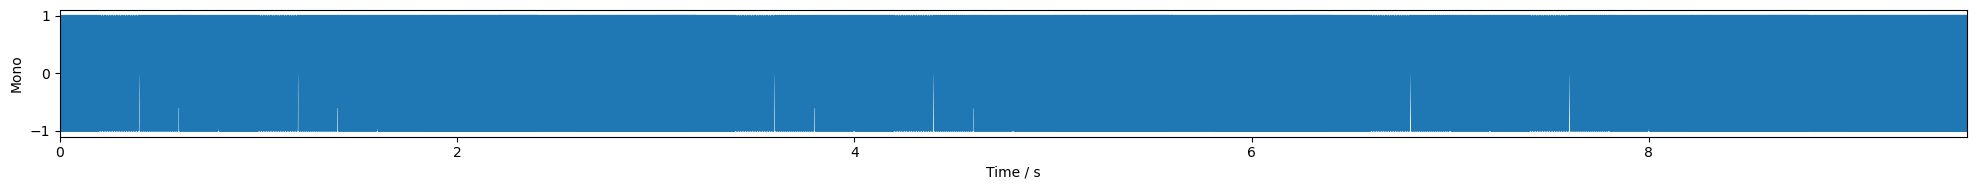

In [6]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**1))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=11025Hz), contains 19.20s
16 11025


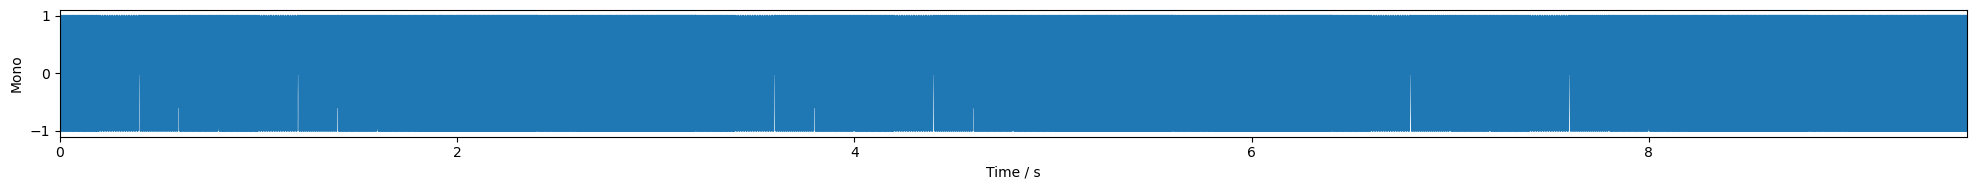

In [7]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**2))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=5512Hz), contains 19.19s
16 5512


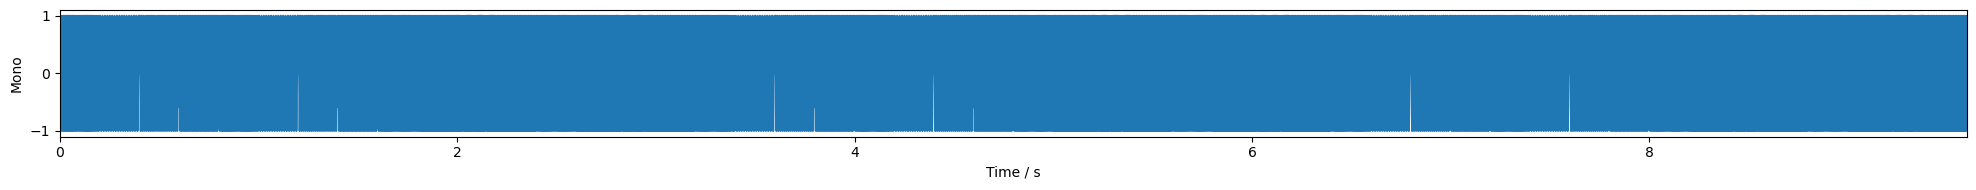

In [8]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**3))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=2756Hz), contains 19.19s
16 2756


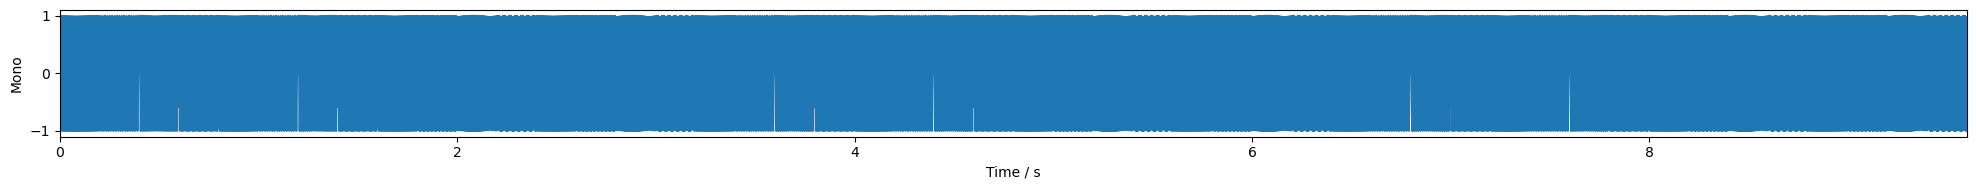

In [9]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**4))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=1378Hz), contains 19.16s
16 1378


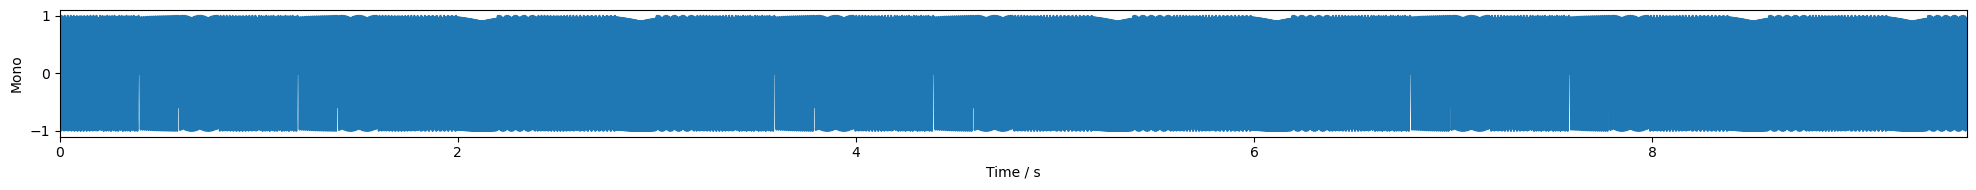

In [10]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**5))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=689Hz), contains 19.09s
16 689


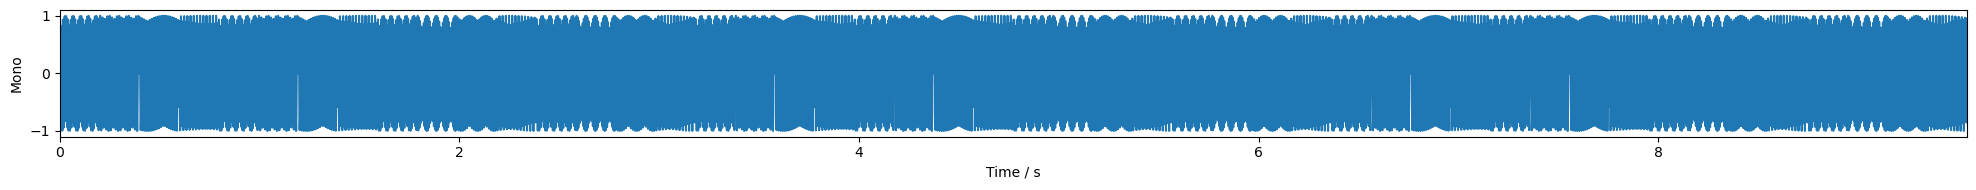

In [11]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**6))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=344Hz), contains 18.98s
16 344


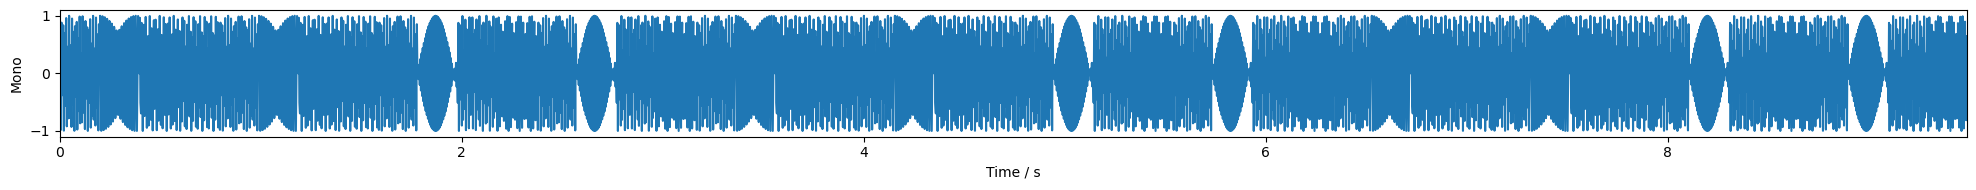

In [12]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**7))
buffer.play()

MonoAudioBuffer, encoder = AmplitudeEncoder (short, sample rate=172Hz), contains 18.98s
16 172


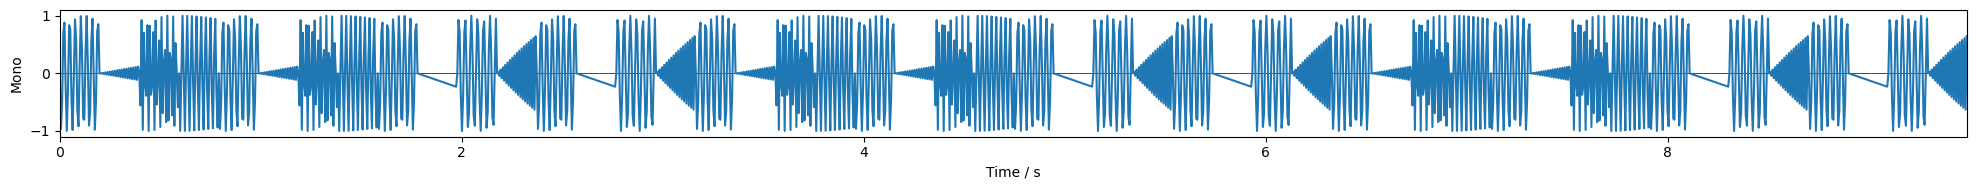

In [13]:
buffer = make_sequence(frequencies, sample_rate=int(44100/2**8))
buffer.play()